In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [36]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the data from all files
data_alliance_univ = pd.read_excel(r"C:\JAGSoM term 4\UDA\UDA Project\Cleaned_data\clean_data_alliance_univ.xlsx")
data_christ_univ = pd.read_excel(r"C:\JAGSoM term 4\UDA\UDA Project\Cleaned_data\clean_data_christ_univ.xlsx")
data_iimb = pd.read_excel(r"C:\JAGSoM term 4\UDA\UDA Project\Cleaned_data\clean_data_IIMB.xlsx")
data_jain_univ = pd.read_excel(r"C:\JAGSoM term 4\UDA\UDA Project\Cleaned_data\clean_data_jain_univ.xlsx")



[nltk_data] Downloading package punkt to C:\Users\ABHISHEK
[nltk_data]     PADHY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ABHISHEK
[nltk_data]     PADHY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ABHISHEK
[nltk_data]     PADHY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data_alliance_univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Author_name          20 non-null     object 
 1   Batch_name           20 non-null     object 
 2   Review_date          20 non-null     object 
 3   total_star_comment   20 non-null     float64
 4   Title_comment        20 non-null     object 
 5   Placements_Star      20 non-null     int64  
 6   Placements           20 non-null     object 
 7   Infrastructure_Star  20 non-null     int64  
 8   Infrastructure       20 non-null     object 
 9   Faculty_Star         20 non-null     int64  
 10  Faculty              20 non-null     object 
 11  CampusLife_Star      20 non-null     int64  
 12  VFM_Star             20 non-null     int64  
 13  other                13 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 2.3+ KB


In [38]:
data_christ_univ.info

<bound method DataFrame.info of          Author_name                                         Batch_name  \
0          Anonymous                    MBA (Marketing) - Batch of 2025   
1          Anonymous           MBA (Business Analytics) - Batch of 2021   
2          Anonymous  BBA in Strategy and Business Analytics - Batch...   
3          Anonymous                           MBA (HR) - Batch of 2025   
4          Anonymous  MBA (Christ -Deemed to be University) + MS (Vi...   
..               ...                                                ...   
243      Vibha Yadav           MBA (Business Analytics) - Batch of 2017   
244  siddharth kumar           MBA (Business Analytics) - Batch of 2019   
245        Aman Arya           MBA (Business Analytics) - Batch of 2020   
246       Prudvi Raj           MBA (Business Analytics) - Batch of 2020   
247    Khushboo Shah           MBA (Business Analytics) - Batch of 2020   

     Review_date  total_star_comment  \
0     9 Jun 2024           

In [39]:
data_iimb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Author_name          40 non-null     object 
 1   Batch_name           40 non-null     object 
 2   Review_date          40 non-null     object 
 3   total_star_comment   40 non-null     float64
 4   Title_comment        26 non-null     object 
 5   Placements_Star      31 non-null     float64
 6   Placements           26 non-null     object 
 7   Infrastructure_Star  31 non-null     float64
 8   Infrastructure       26 non-null     object 
 9   Faculty_Star         31 non-null     float64
 10  Faculty              26 non-null     object 
 11  CampusLife_Star      31 non-null     float64
 12  VFM_Star             31 non-null     float64
 13  other                14 non-null     object 
 14  no_topic             13 non-null     object 
 15  Unnamed: 15          0 non-null      float

In [40]:
data_jain_univ.describe()

total_star_comment  Placements_Star  Infrastructure_Star  Faculty_Star  \
count           99.000000        99.000000            99.000000     99.000000   
mean             3.963636         4.060606             3.878788      4.060606   
std              0.766313         0.945647             0.982217      0.977483   
min              1.000000         1.000000             1.000000      1.000000   
25%              3.600000         4.000000             3.000000      4.000000   
50%              4.000000         4.000000             4.000000      4.000000   
75%              4.400000         5.000000             5.000000      5.000000   
max              5.000000         5.000000             5.000000      5.000000   

       CampusLife_Star   VFM_Star  
count        99.000000  99.000000  
mean          4.141414   3.676768  
std           0.914845   1.018485  
min           1.000000   1.000000  
25%           4.000000   3.000000  
50%           4.000000   4.000000  
75%           5.000000   4.000000  
max           5.000000   5.000000

In [41]:
# Fill NaN values with empty strings
data_alliance_univ.fillna('', inplace=True)
data_christ_univ.fillna('', inplace=True)
data_jain_univ.fillna('', inplace=True)
data_iimb.fillna('', inplace=True)

In [42]:
data_christ_univ.info

<bound method DataFrame.info of          Author_name                                         Batch_name  \
0          Anonymous                    MBA (Marketing) - Batch of 2025   
1          Anonymous           MBA (Business Analytics) - Batch of 2021   
2          Anonymous  BBA in Strategy and Business Analytics - Batch...   
3          Anonymous                           MBA (HR) - Batch of 2025   
4          Anonymous  MBA (Christ -Deemed to be University) + MS (Vi...   
..               ...                                                ...   
243      Vibha Yadav           MBA (Business Analytics) - Batch of 2017   
244  siddharth kumar           MBA (Business Analytics) - Batch of 2019   
245        Aman Arya           MBA (Business Analytics) - Batch of 2020   
246       Prudvi Raj           MBA (Business Analytics) - Batch of 2020   
247    Khushboo Shah           MBA (Business Analytics) - Batch of 2020   

     Review_date  total_star_comment  \
0     9 Jun 2024           

In [43]:
data_christ_univ.head()

Author_name                                         Batch_name  Review_date  \
0   Anonymous                    MBA (Marketing) - Batch of 2025   9 Jun 2024   
1   Anonymous           MBA (Business Analytics) - Batch of 2021  14 May 2024   
2   Anonymous  BBA in Strategy and Business Analytics - Batch...   1 Feb 2024   
3   Anonymous                           MBA (HR) - Batch of 2025  14 May 2024   
4   Anonymous  MBA (Christ -Deemed to be University) + MS (Vi...  13 May 2024   

   total_star_comment                                          all_stars  \
0                 4.4  4.4 \nPlacements 4\nInfrastructure 4\nFaculty ...   
1                 5.0  5.0 \nPlacements 5\nInfrastructure 5\nFaculty ...   
2                 2.6  2.6 \nPlacements 2\nInfrastructure 4\nFaculty ...   
3                 4.2  4.2 \nPlacements 4\nInfrastructure 4\nFaculty ...   
4                 5.0  5.0 \nPlacements 5\nInfrastructure 5\nFaculty ...   

                                       Title_comment  Placements_Star  \
0  Good facilities, placements, friends, and campus.                4   
1                    Best University for MBA-Courses                5   
2        Christ is not what I had expected it to be.                2   
3                Masters in business administration.                4   
4  The college is really good. And this is the be...                5   

                                          Placements  Infrastructure_Star  \
0  Placements: Despite having a high fee and repu...                    4   
1  Placements: About 90% of students are admitted...                    5   
2  Placements: Very few of my seniors have been p...                    4   
3  Placements: Our college provides excellence in...                    4   
4  Placements: Approximately 95% of students from...                    5   

                                      Infrastructure  Faculty_Star  \
0  Infrastructure: The campus is really beautiful...             5   
1  Infrastructure: The Central Building is stunni...             5   
2  Infrastructure: Infrastructure of our campus i...             2   
3  Infrastructure: The infrastructure of our coll...             4   
4  Infrastructure: The course enjoys state-of-the...             5   

                                             Faculty  CampusLife_Star  \
0  I chose an MBA to improve myself on an individ...                5   
1  Not all faculty members are good, which is the...                5   
2  The teachers are qualified yes but the classes...                3   
3  Our teachers are very supportive, as they also...                5   
4  The faculty comprises highly qualified and exp...                5   

   VFM_Star                                              other  
0         4  Other: Christ bgr has conducts one of the best...  
1         5  Other: I opted for this course, because of my ...  
2         2  Other: The university has a lot of clubs where...  
3         4  Other: It has a diverse crowd. Certain competi...  
4         5  Other: Currently, I'm pursuing my MBA from Chr...

In [52]:
# Define custom stopwords
custom_stopwords = set(stopwords.words('english')).union({"infrastructure", "faculty", "other", "student", "college", "placements", "placement"})

# Define a function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in custom_stopwords]
    return ' '.join(words)


In [53]:
# Print the first few rows of the "Placements" column before cleaning
print("Before cleaning:")
print(data_christ_univ.Placements.head())

# Apply the clean_text function to the "Placements" column
data_christ_univ['Placements'] = data_christ_univ['Placements'].astype(str).apply(clean_text)

# Print the first few rows of the "Placements" column after cleaning
print("\nAfter cleaning:")
print(data_christ_univ.Placements.head())

Before cleaning:
0    despite high fee reputation average package of...
1    students admitted end year remaining students ...
2    seniors placed average package christ around l...
3    provides excellence placement activities compa...
4    approximately students mba program christ univ...
Name: Placements, dtype: object

After cleaning:
0    despite high fee reputation average package of...
1    students admitted end year remaining students ...
2    seniors placed average package christ around l...
3    provides excellence activities companies like ...
4    approximately students mba program christ univ...
Name: Placements, dtype: object


In [55]:
# Print the first few rows of the "Faculty" column before cleaning
print("Before cleaning:")
print(data_jain_univ.Faculty.head())

# Apply the clean_text function to the "Placements" column
data_jain_univ['Placements'] = data_jain_univ['Placements'].astype(str).apply(clean_text)

# Print the first few rows of the "Placements" column after cleaning
print("\nAfter cleaning:")
print(data_jain_univ.Placements.head())

Before cleaning:
0    Faculty: Teachers and course both are practica...
1    Faculty: The teachers are helpful to students ...
2    Faculty: All teachers and professors were good...
3    Faculty: All the teachers at the college are w...
4    Faculty: The pass percentage is 35% because at...
Name: Faculty, dtype: object

After cleaning:
0    amazing see tier still improving highest packa...
1    percent students placed course around really g...
2    opted mba finance students entire batch placed...
3    year almost students got placed many top recru...
4    highest salary package offered course lpa big ...
Name: Placements, dtype: object


In [56]:
# Define a function to clean and print data
def process_and_clean(data, columns):
    for column in columns:
        if column in data.columns:
            print(f"Before cleaning {column}:")
            print(data[column].head())
            data[column] = data[column].astype(str).apply(clean_text)
            print(f"\nAfter cleaning {column}:")
            print(data[column].head())
            print("\n")
    return data

In [58]:
# Columns to be cleaned
columns_to_clean = ["Title_comment", "Placements", "Infrastructure", "Faculty", "other"]

# Clean each dataset
data_alliance_univ = process_and_clean(data_alliance_univ, columns_to_clean)
data_christ_univ = process_and_clean(data_christ_univ, columns_to_clean)
data_iimb = process_and_clean(data_iimb, columns_to_clean)
data_jain_univ = process_and_clean(data_jain_univ, columns_to_clean)

Before cleaning Title_comment:
0                                   good many students
1                                 outstanding teaching
2    campus life worse improving offering great exp...
3                               really good facilities
4                        alliance university bangalore
Name: Title_comment, dtype: object

After cleaning Title_comment:
0                                   good many students
1                                 outstanding teaching
2    campus life worse improving offering great exp...
3                               really good facilities
4                        alliance university bangalore
Name: Title_comment, dtype: object


Before cleaning Placements:
0    per information previous batches almost everyo...
1    mba programme high placement rate average stud...
2    top companies visited year altair teach maersk...
3    students placed good companies cse course high...
4    comes compared colleges state provides offer h...
Name: Placeme

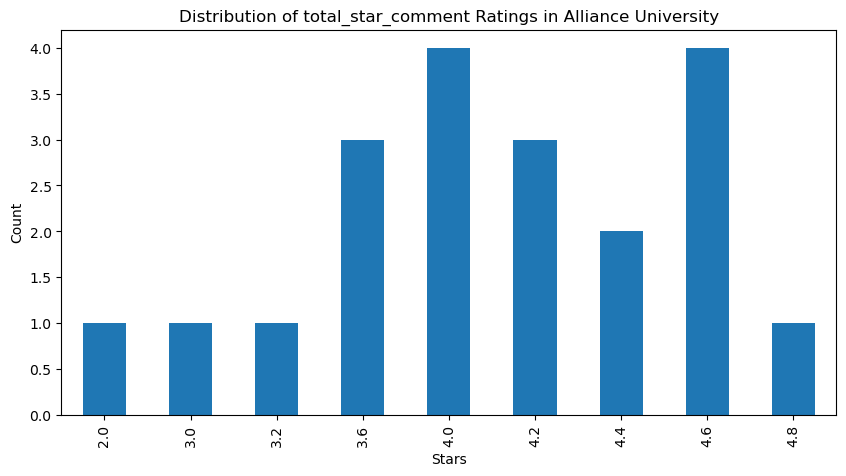

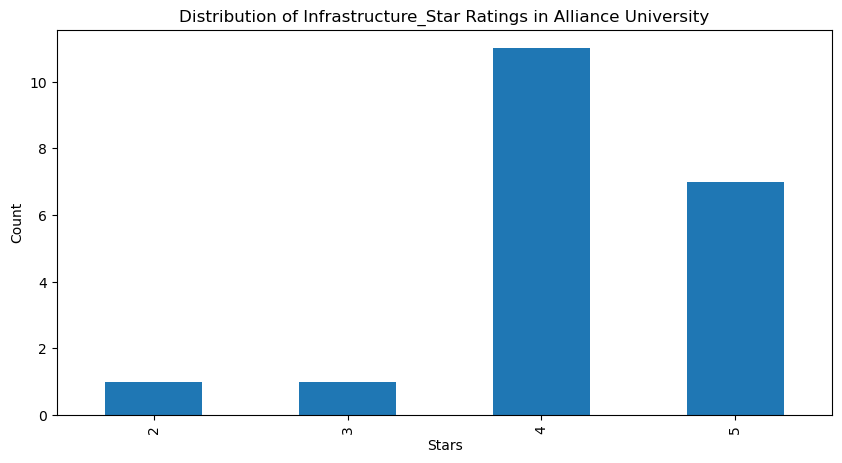

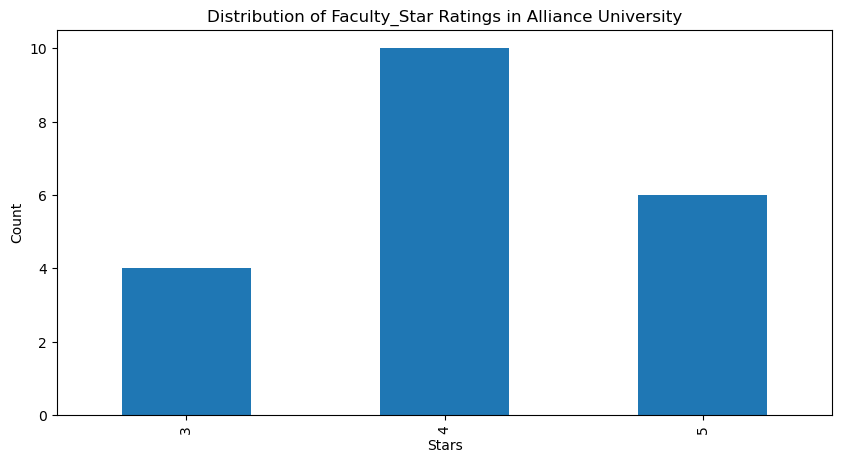

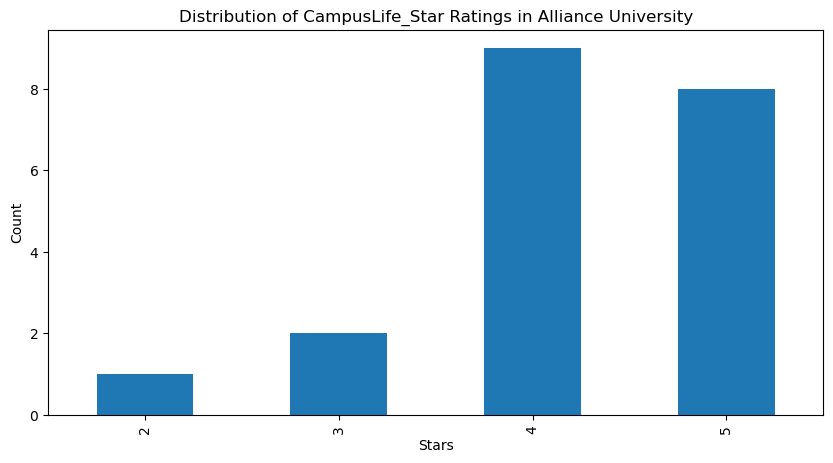

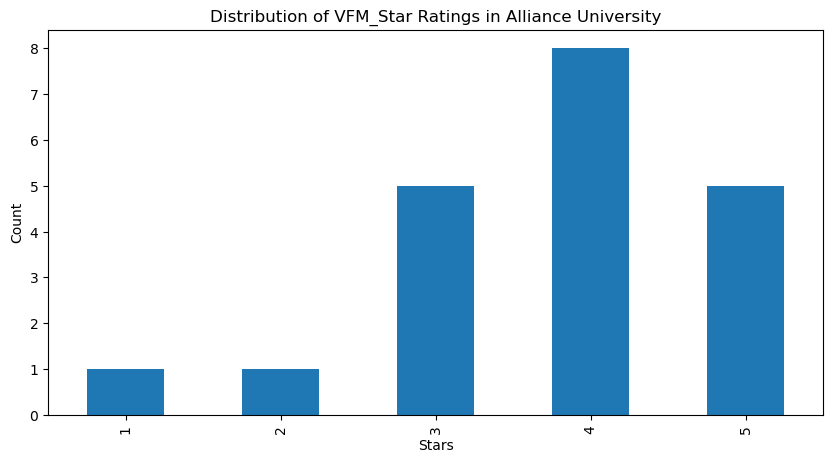

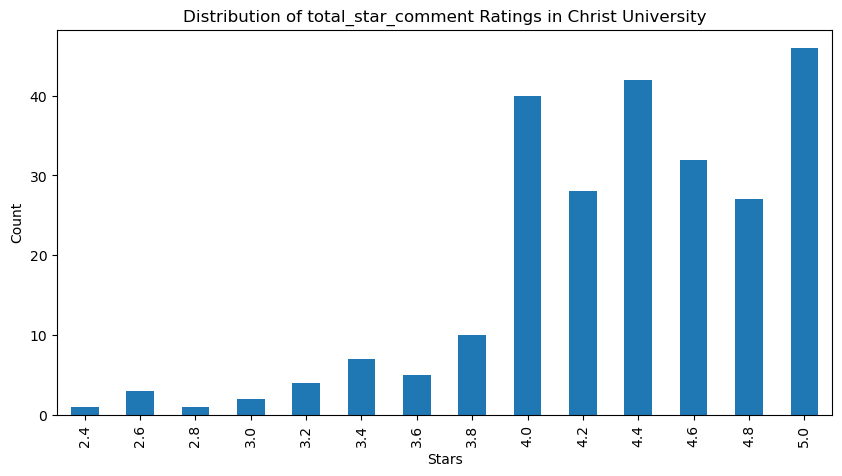

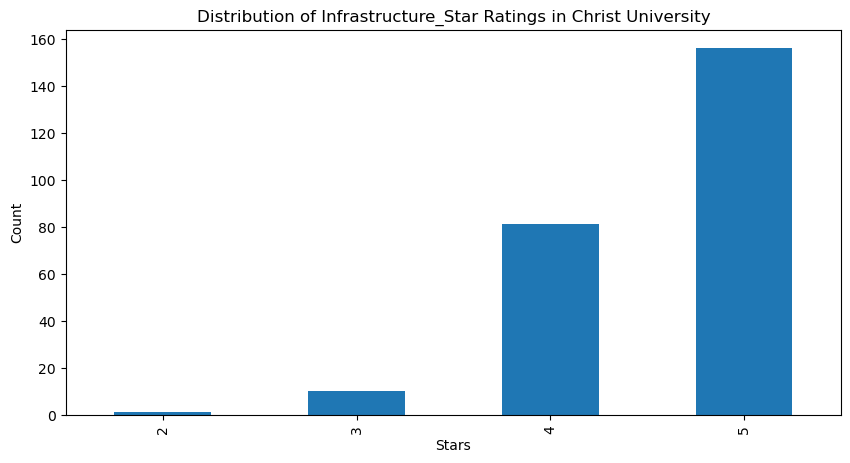

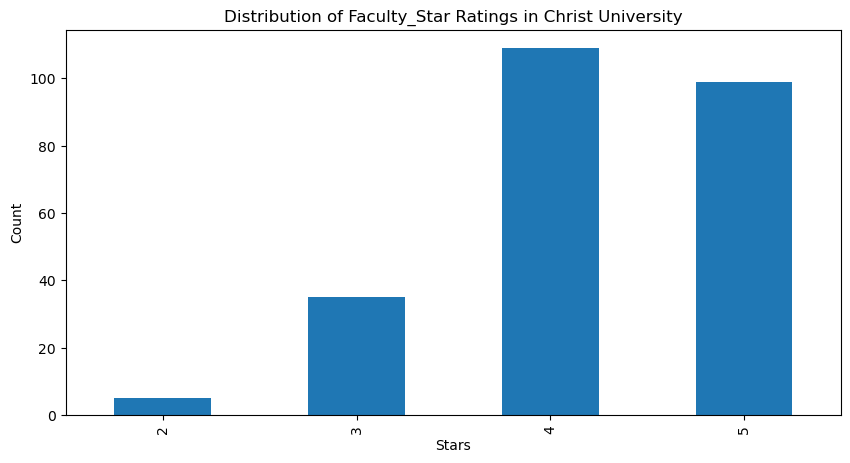

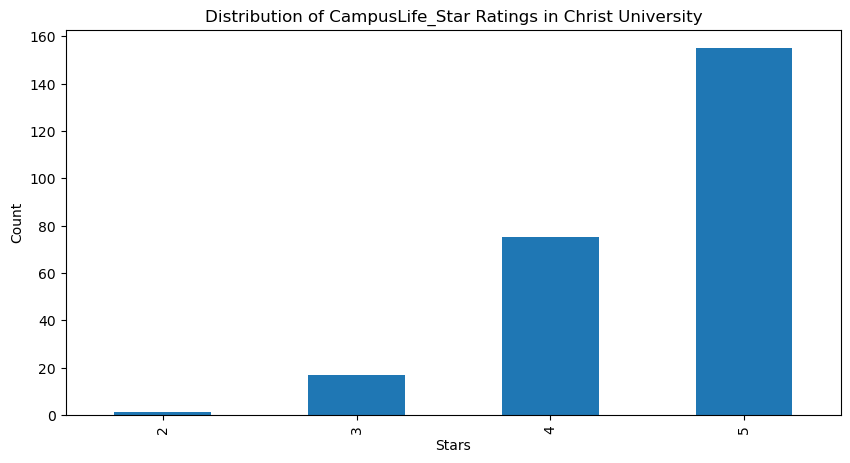

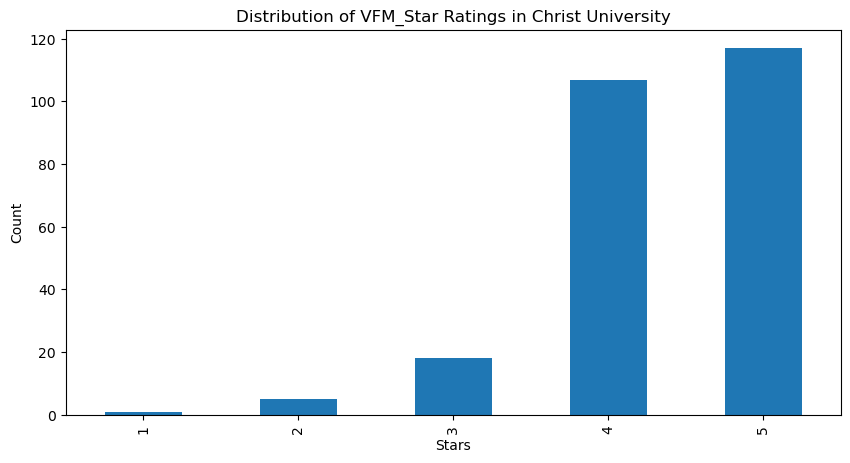

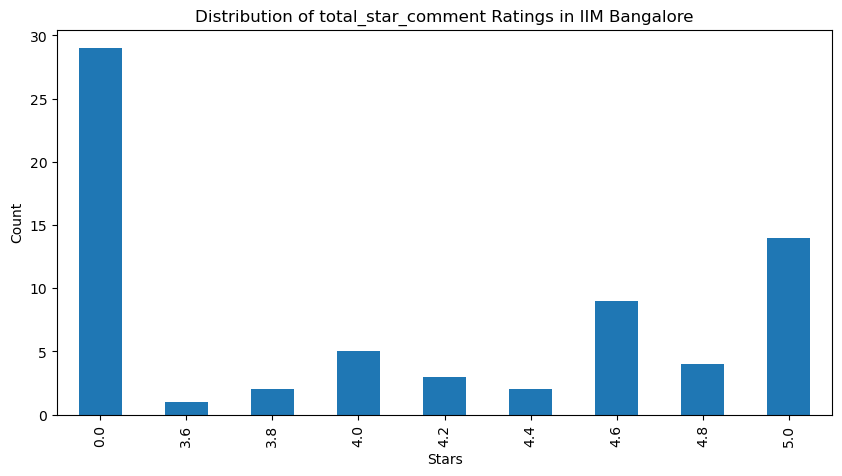

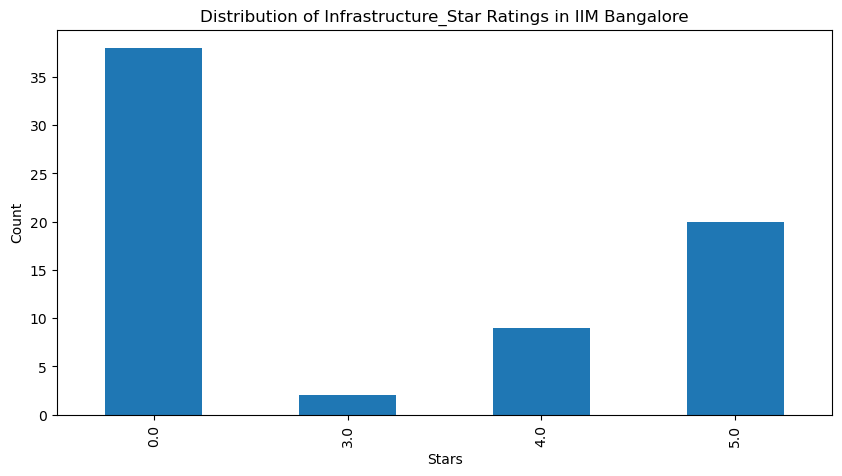

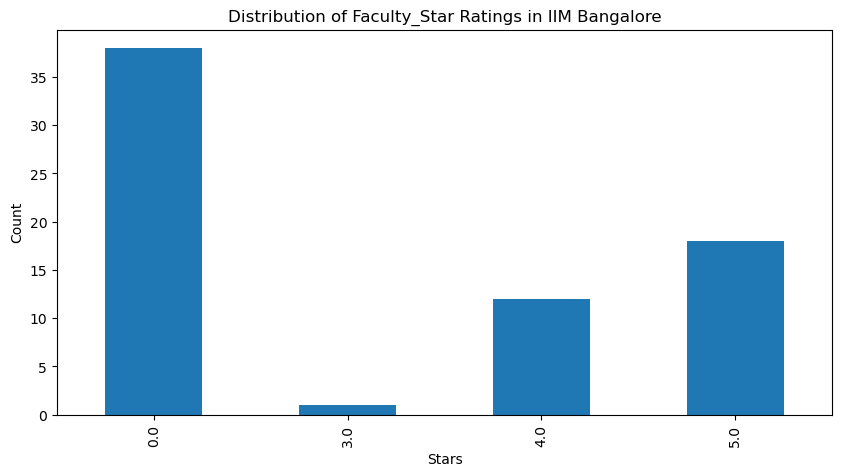

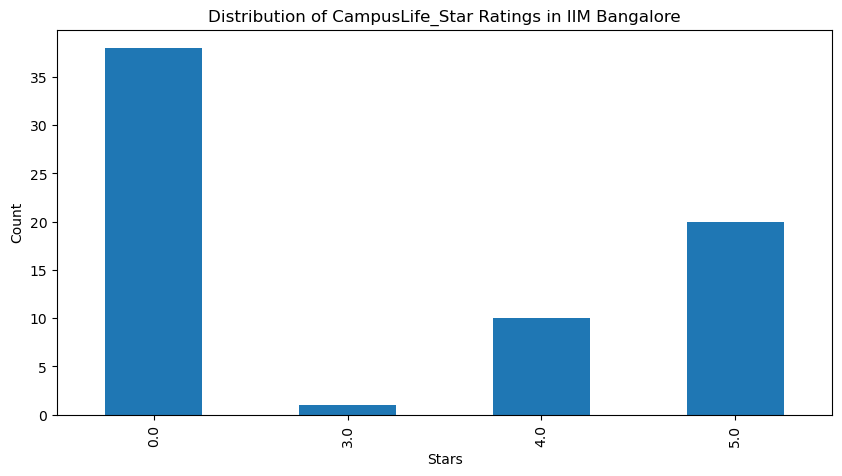

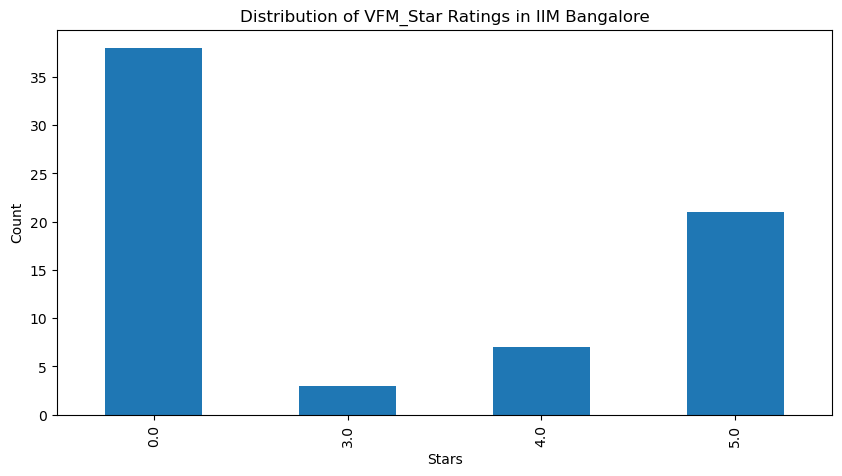

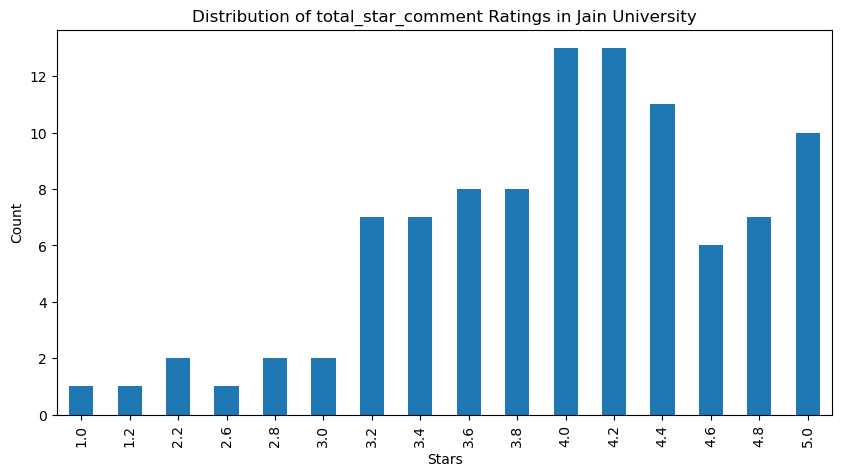

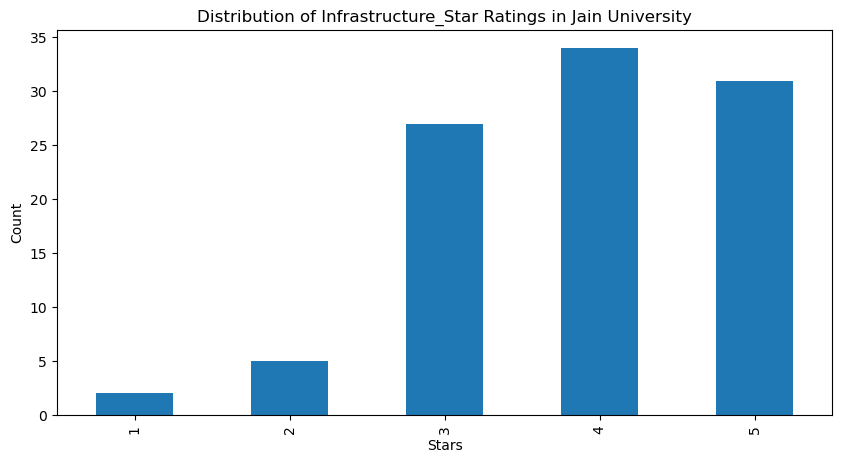

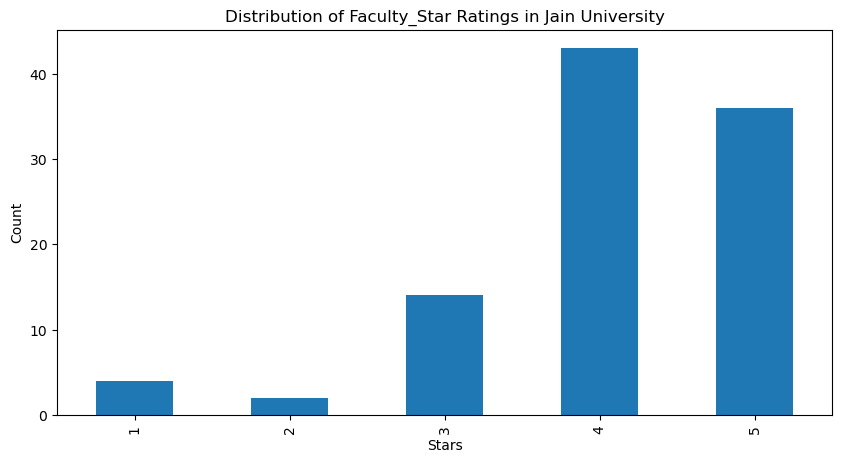

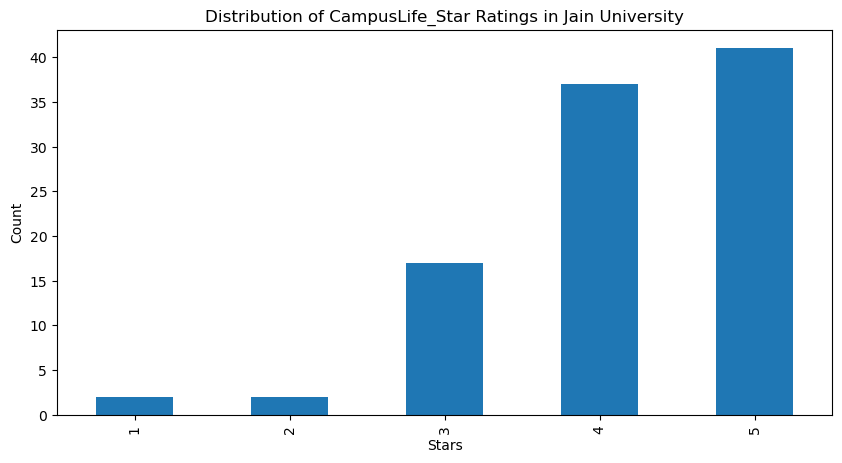

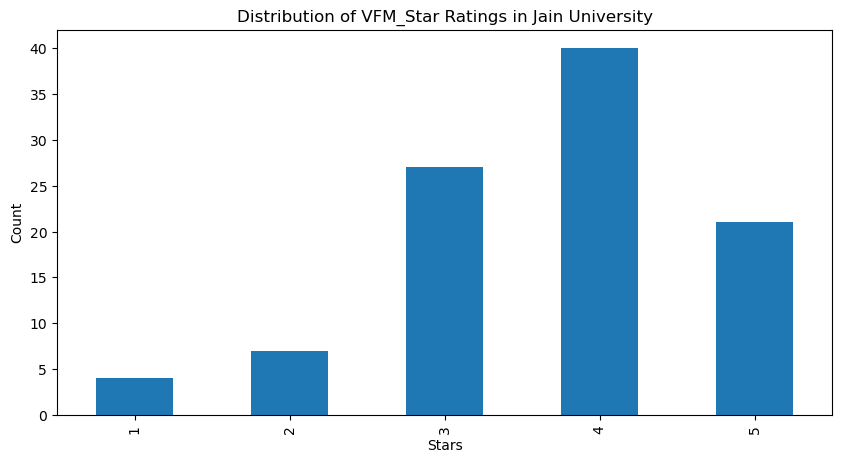

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to plot the distribution of star ratings
def plot_star_distribution(data, dataset_name):
    star_columns = ["total_star_comment", "Infrastructure_Star", "Faculty_Star", "CampusLife_Star", "VFM_Star"]

    for column in star_columns:
        if column in data.columns:
            # Convert to numeric, forcing errors to NaN
            data[column] = pd.to_numeric(data[column], errors='coerce')
            
            # Fill NaN values with 0 or any other suitable value
            data[column].fillna(0, inplace=True)

            # Plot distribution
            plt.figure(figsize=(10, 5))
            data[column].value_counts().sort_index().plot(kind='bar')
            plt.title(f'Distribution of {column} Ratings in {dataset_name}')
            plt.xlabel('Stars')
            plt.ylabel('Count')
            plt.show()

# Plot star rating distribution for each dataset
plot_star_distribution(data_alliance_univ, 'Alliance University')
plot_star_distribution(data_christ_univ, 'Christ University')
plot_star_distribution(data_iimb, 'IIM Bangalore')
plot_star_distribution(data_jain_univ, 'Jain University')



In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define the sentiment columns for analysis
sentiment_columns = ["Title_comment", "Placements", "Infrastructure", "Faculty", "other"]

# Function to compute sentiment scores
def sentiment_scores(text):
    return sid.polarity_scores(text)

# Apply sentiment analysis on each review column for Christ University
for column in sentiment_columns:
    data_christ_univ[column + '_sentiment'] = data_christ_univ[column].apply(sentiment_scores)

# Apply sentiment analysis on each review column for IIM Bangalore
for column in sentiment_columns:
    data_iimb[column + '_sentiment'] = data_iimb[column].apply(sentiment_scores)

# Apply sentiment analysis on each review column for Jain University
for column in sentiment_columns:
    data_jain_univ[column + '_sentiment'] = data_jain_univ[column].apply(sentiment_scores)

# Apply sentiment analysis on each review column for Alliance University
for column in sentiment_columns:
    data_alliance_univ[column + '_sentiment'] = data_alliance_univ[column].apply(sentiment_scores)

# Display sentiment analysis results for Christ University
for column in sentiment_columns:
    print(f'Sentiment analysis for {column} at Christ University')
    print(data_christ_univ[column + '_sentiment'].head())

# Display sentiment analysis results for IIM Bangalore
for column in sentiment_columns:
    print(f'Sentiment analysis for {column} at IIM Bangalore')
    print(data_iimb[column + '_sentiment'].head())

# Display sentiment analysis results for Jain University
for column in sentiment_columns:
    print(f'Sentiment analysis for {column} at Jain University')
    print(data_jain_univ[column + '_sentiment'].head())

# Display sentiment analysis results for Alliance University
for column in sentiment_columns:
    print(f'Sentiment analysis for {column} at Alliance University')
    print(data_alliance_univ[column + '_sentiment'].head())



Sentiment analysis for Title_comment at Christ University
0    {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compou...
1    {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.207, 'pos': 0.793, 'comp...
Name: Title_comment_sentiment, dtype: object
Sentiment analysis for Placements at Christ University
0    {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...
1    {'neg': 0.126, 'neu': 0.778, 'pos': 0.096, 'co...
2    {'neg': 0.086, 'neu': 0.831, 'pos': 0.083, 'co...
3    {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...
4    {'neg': 0.043, 'neu': 0.786, 'pos': 0.172, 'co...
Name: Placements_sentiment, dtype: object
Sentiment analysis for Infrastructure at Christ University
0    {'neg': 0.087, 'neu': 0.677, 'pos': 0.236, 'co...
1    {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp...
2    {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...
3    {'neg': 0.0, 'neu': 0

In [74]:
# Create DataFrames for each university's sentiment analysis results
df_christ = pd.DataFrame(data_christ_univ, columns=[f'{col}_sentiment' for col in sentiment_columns])
df_iimb = pd.DataFrame(data_iimb, columns=[f'{col}_sentiment' for col in sentiment_columns])
df_jain = pd.DataFrame(data_jain_univ, columns=[f'{col}_sentiment' for col in sentiment_columns])
df_alliance = pd.DataFrame(data_alliance_univ, columns=[f'{col}_sentiment' for col in sentiment_columns])

# Combine all DataFrames into one DataFrame for tabulation
all_sentiments = pd.concat([df_christ, df_iimb, df_jain,df_alliance], axis=1, keys=['Christ University', 'IIM Bangalore', 'Jain University', 'Alliance University'])

# Display the tabulated sentiment analysis results
print(all_sentiments)

                                     Christ University  \
                               Title_comment_sentiment   
0    {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compou...   
1    {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...   
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
4    {'neg': 0.0, 'neu': 0.207, 'pos': 0.793, 'comp...   
..                                                 ...   
243  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...   
244  {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...   
245  {'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'comp...   
246  {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...   
247  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...   

                                                        \
                                  Placements_sentiment   
0    {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...   
1    {'neg': 0.126, 'neu': 0.778, 'pos': 0.096, 'co...   
2    {'neg': 

In [82]:
## Initialize an empty list to store DataFrames
dfs = []

# Populate the list with DataFrame for each university's sentiment analysis results
for university, aspects in all_sentiments.items():
    aspect_data = []
    for aspect, sentiment in aspects.items():
        if isinstance(sentiment, dict):  # Check if sentiment is a dictionary
            aspect_data.append({
                'University': university,
                'Aspect': str(aspect).replace('_sentiment', ''),
                'Negative': sentiment.get('neg', 0),
                'Neutral': sentiment.get('neu', 0),
                'Positive': sentiment.get('pos', 0),
                'Compound': sentiment.get('compound', 0)
            })
    df = pd.DataFrame(aspect_data)
    dfs.append(df)

# Concatenate all DataFrames in the list
tabulated_data = pd.concat(dfs, ignore_index=True)

# Display the tabulated sentiment analysis results
print(tabulated_data)


                                        University Aspect  Negative  Neutral  \
0     (Christ University, Title_comment_sentiment)      0       0.0    0.250   
1     (Christ University, Title_comment_sentiment)      1       0.0    0.323   
2     (Christ University, Title_comment_sentiment)      2       0.0    1.000   
3     (Christ University, Title_comment_sentiment)      3       0.0    1.000   
4     (Christ University, Title_comment_sentiment)      4       0.0    0.207   
...                                            ...    ...       ...      ...   
2175        (Alliance University, other_sentiment)     15       0.0    0.000   
2176        (Alliance University, other_sentiment)     16       0.0    0.000   
2177        (Alliance University, other_sentiment)     17       0.0    0.628   
2178        (Alliance University, other_sentiment)     18       0.0    0.435   
2179        (Alliance University, other_sentiment)     19       0.0    0.323   

      Positive  Compound  
0        0.7

In [84]:
tabulated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   University  2180 non-null   object 
 1   Aspect      2180 non-null   object 
 2   Negative    2180 non-null   float64
 3   Neutral     2180 non-null   float64
 4   Positive    2180 non-null   float64
 5   Compound    2180 non-null   float64
dtypes: float64(4), object(2)
memory usage: 102.3+ KB


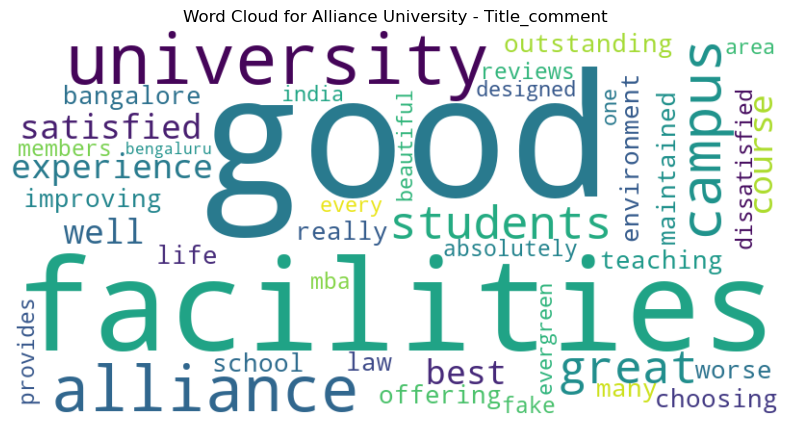

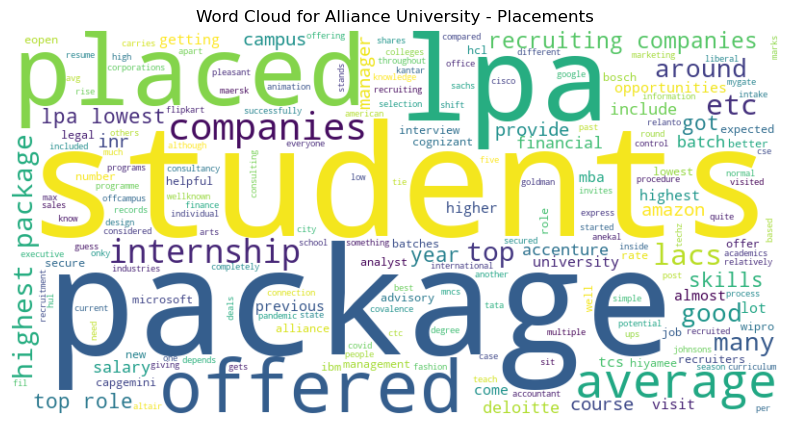

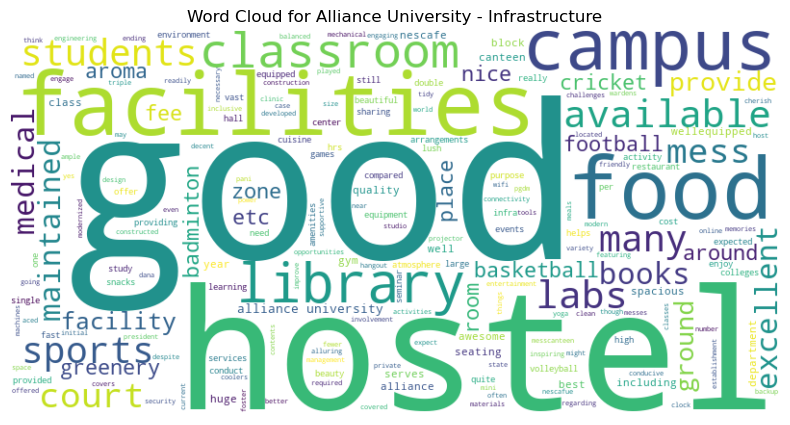

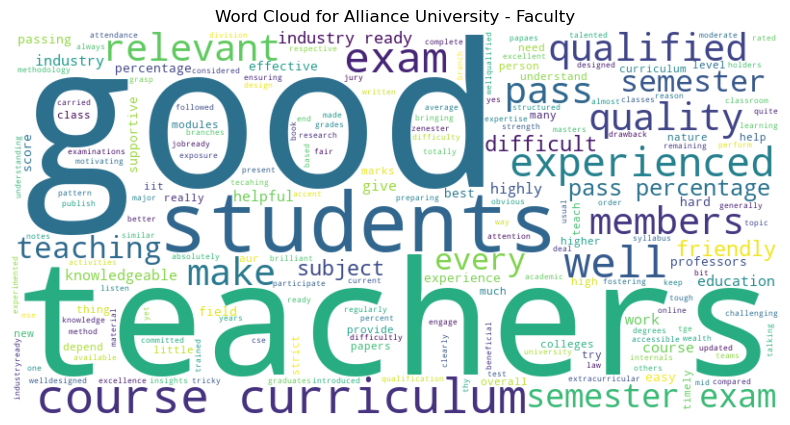

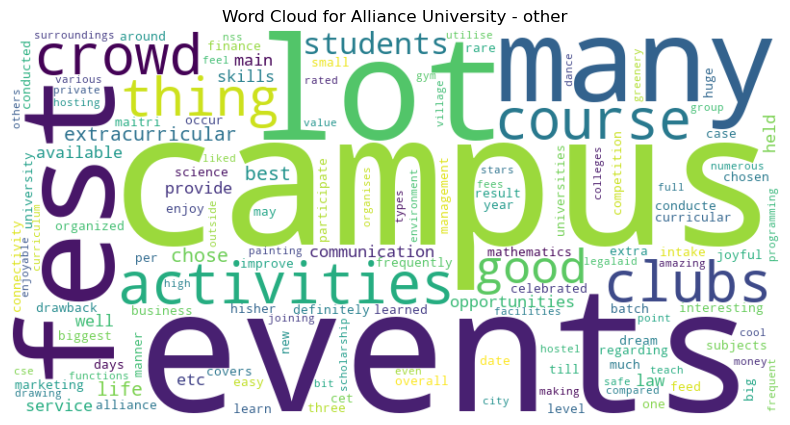

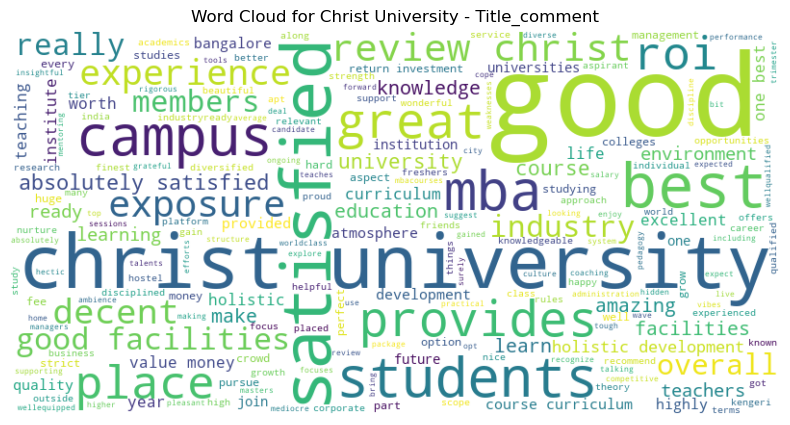

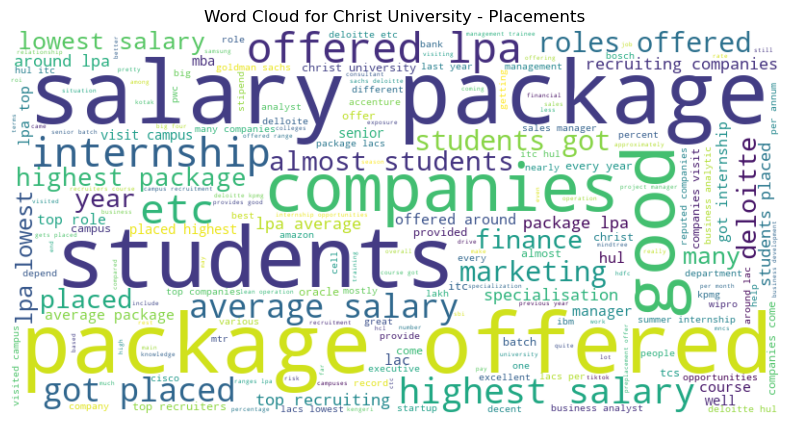

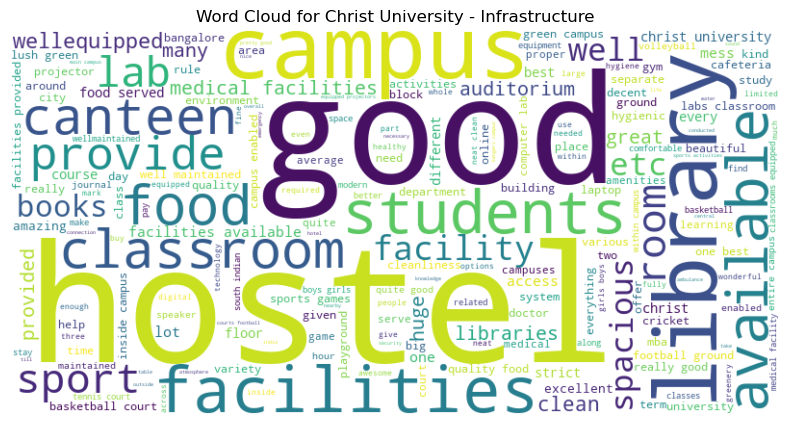

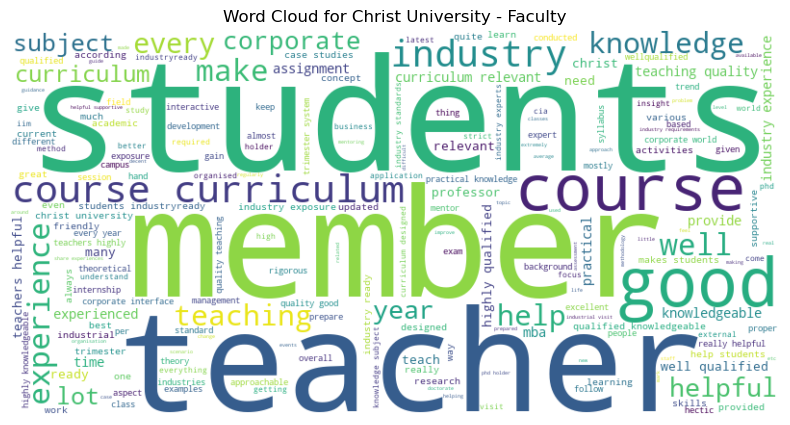

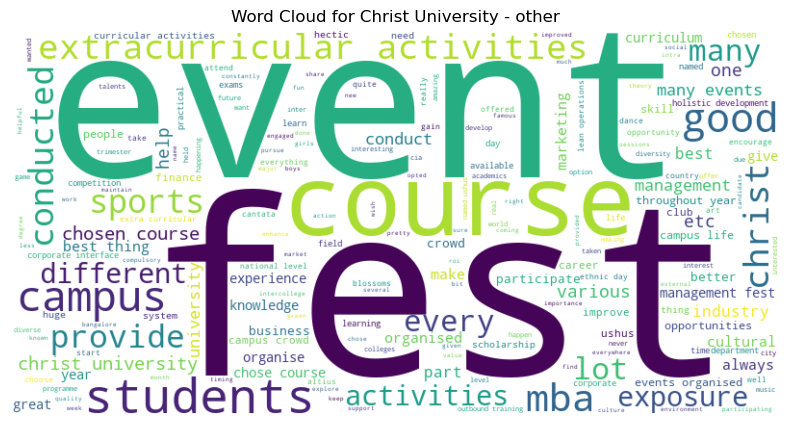

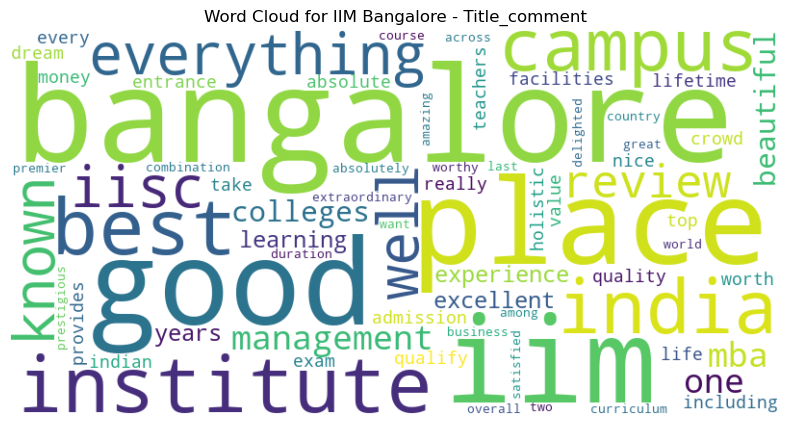

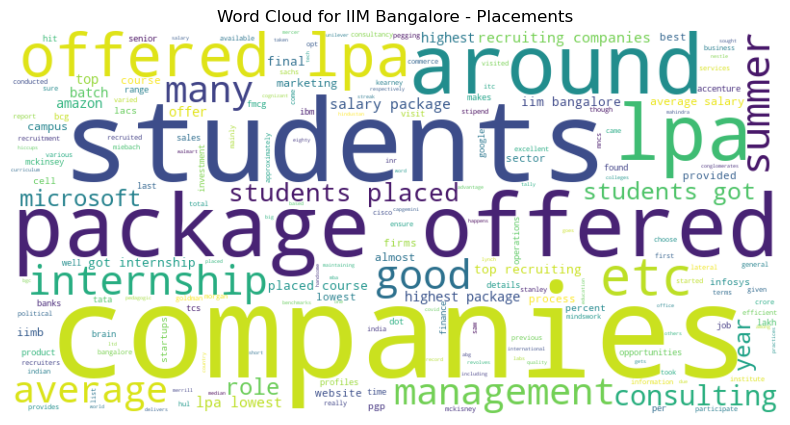

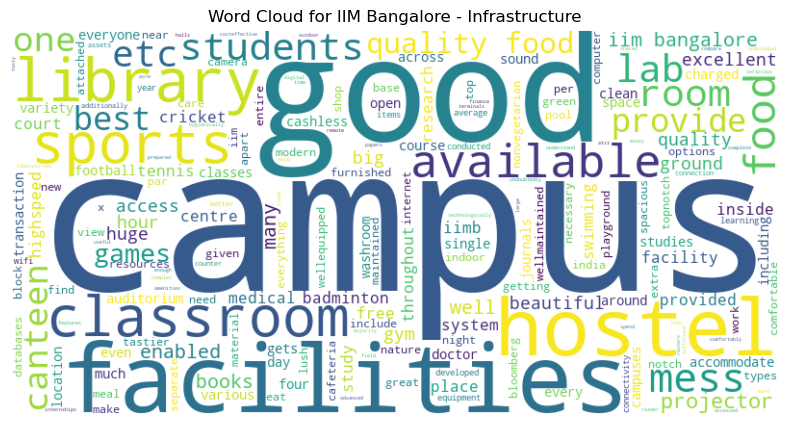

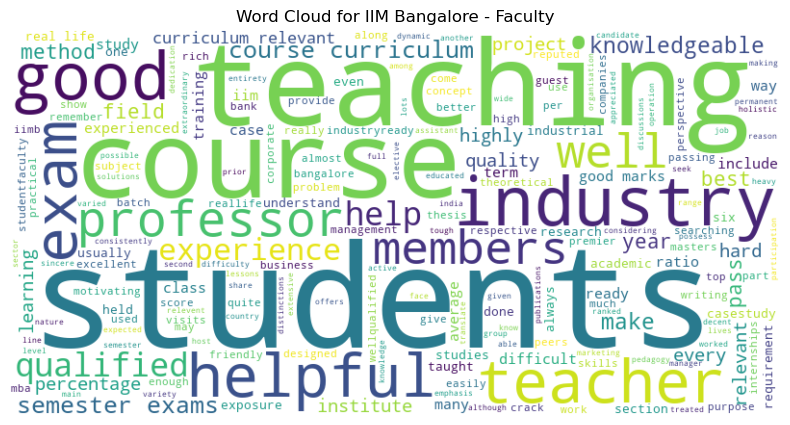

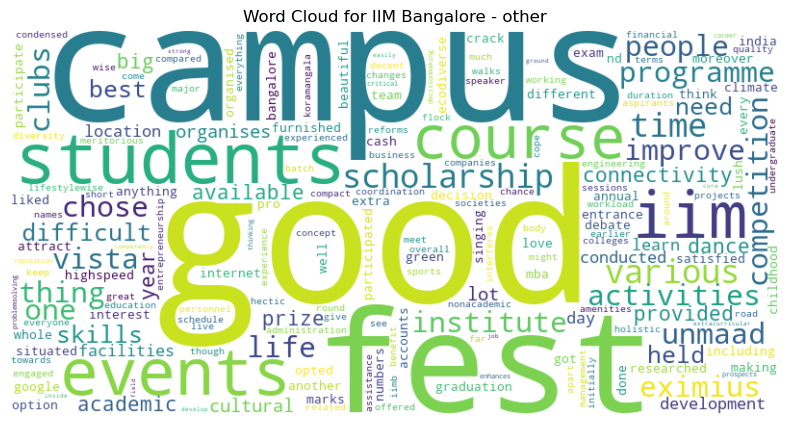

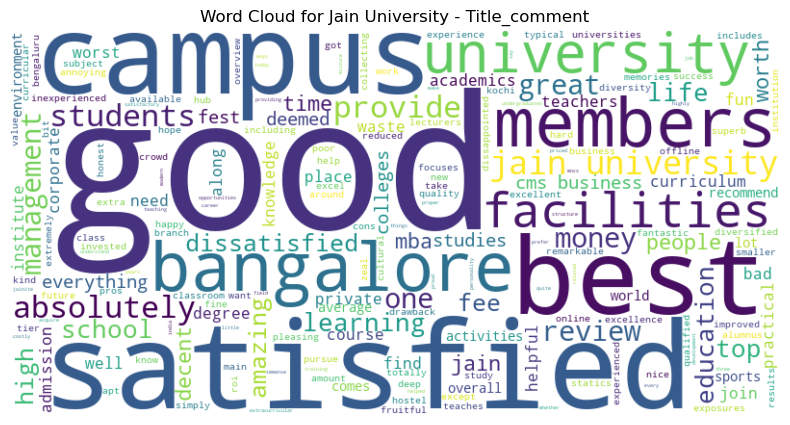

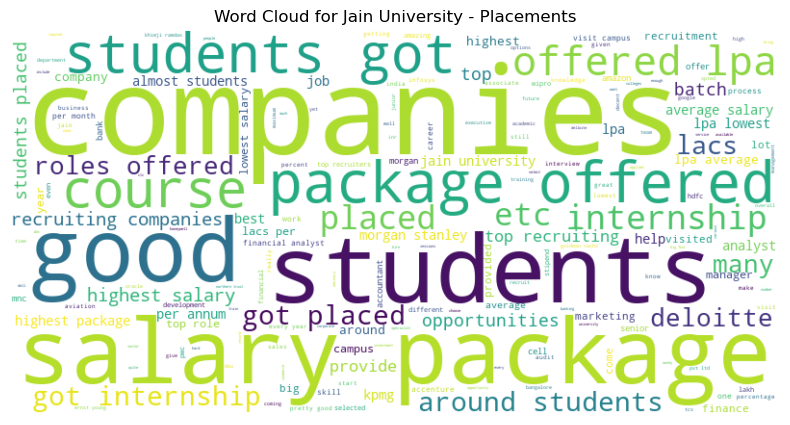

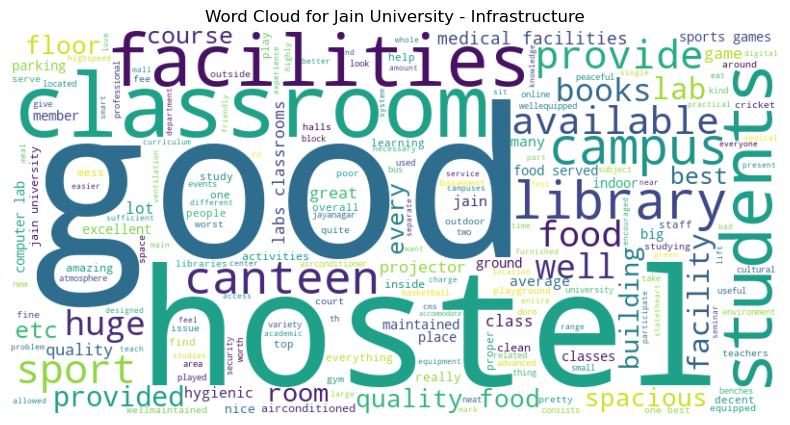

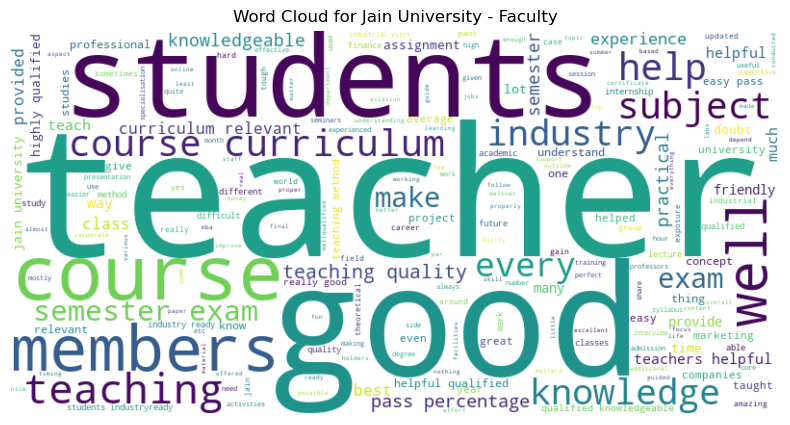

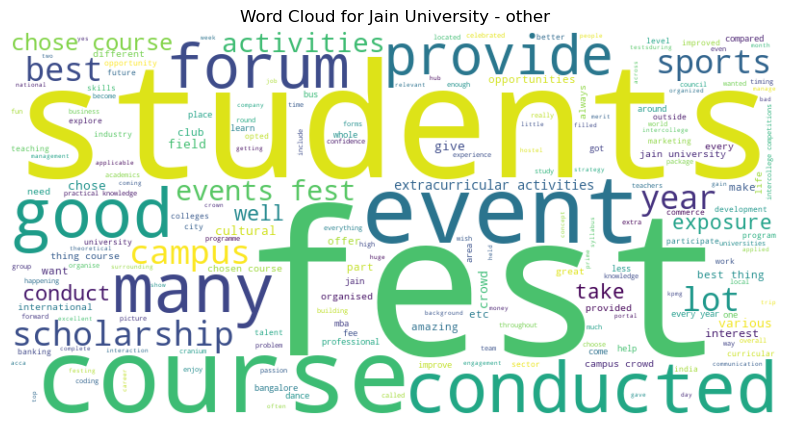

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define sentiment columns
sentiment_columns = ["Title_comment", "Placements", "Infrastructure", "Faculty", "other"]

# Generate word clouds for each review category for Alliance University
for column in sentiment_columns:
    text = ' '.join(data_alliance_univ[column].astype(str))  # Convert column to string and join the text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Alliance University - {column}')
    plt.show()

# Generate word clouds for each review category for Christ University
for column in sentiment_columns:
    text = ' '.join(data_christ_univ[column].astype(str))  # Convert column to string and join the text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Christ University - {column}')
    plt.show()

# Generate word clouds for each review category for IIM Bangalore
for column in sentiment_columns:
    text = ' '.join(data_iimb[column].astype(str))  # Convert column to string and join the text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for IIM Bangalore - {column}')
    plt.show()

# Generate word clouds for each review category for Jain University
for column in sentiment_columns:
    text = ' '.join(data_jain_univ[column].astype(str))  # Convert column to string and join the text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Jain University - {column}')
    plt.show()


Preprocess Text:
Tokenize, lemmatize, and prepare the text for analysis.

In [92]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization to each review column
for column in sentiment_columns:
    data_alliance_univ[column] = data_alliance_univ[column].apply(tokenize_and_lemmatize)
    data_christ_univ[column] = data_christ_univ[column].apply(tokenize_and_lemmatize)
    data_iimb[column] = data_iimb[column].apply(tokenize_and_lemmatize)
    data_jain_univ[column] = data_jain_univ[column].apply(tokenize_and_lemmatize)

# Print the results after tokenization and lemmatization for each university
print("Alliance University:")
print(data_alliance_univ[sentiment_columns])

print("\nChrist University:")
print(data_christ_univ[sentiment_columns])

print("\nIIM Bangalore:")
print(data_iimb[sentiment_columns])

print("\nJain University:")
print(data_jain_univ[sentiment_columns])


Alliance University:
                                        Title_comment  \
0                                   good many student   
1                                outstanding teaching   
2   campus life worse improving offering great exp...   
3                                really good facility   
4                       alliance university bangalore   
5                                       facility good   
6                      alliance university school law   
7                well maintained environment facility   
8                                 alliance university   
9                                 alliance university   
10                                 satisfied choosing   
11                absolutely dissatisfied fake review   
12                          provides good member good   
13                                   good mba student   
14     well designed course beautiful campus facility   
15                     one best india best every area   
16        

C:\Users\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[0.         0.01773319 0.         ... 0.         0.         0.04424916]
 [0.         0.         0.         ... 0.         0.         0.04818583]
 [0.         0.03915314 0.         ... 0.02722029 0.05148267 0.        ]
 [0.03461663 0.         0.         ... 0.         0.         0.        ]
 [0.01673567 0.01409597 0.01706145 ... 0.         0.         0.01117992]]


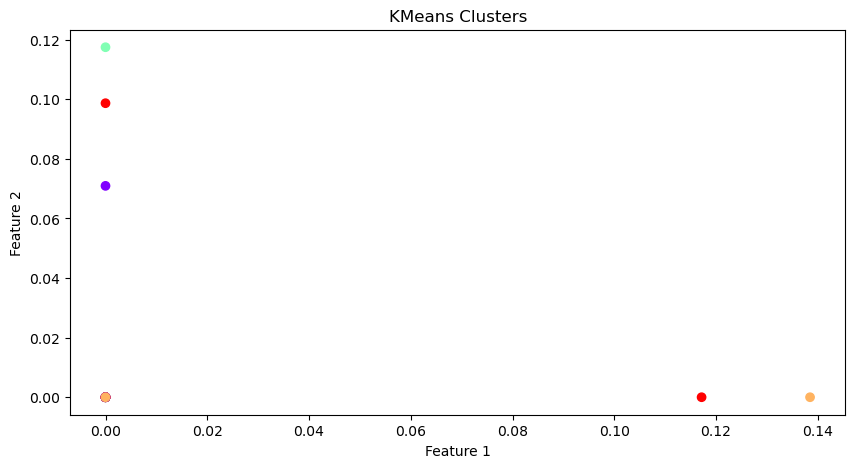

C:\Users\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[0.         0.00608396 0.00580157 ... 0.00166412 0.00154423 0.        ]
 [0.00365846 0.         0.00610926 ... 0.         0.00337382 0.00390433]
 [0.         0.         0.00253562 ... 0.         0.         0.        ]
 [0.         0.         0.00294119 ... 0.         0.         0.00414669]
 [0.         0.         0.         ... 0.         0.         0.        ]]


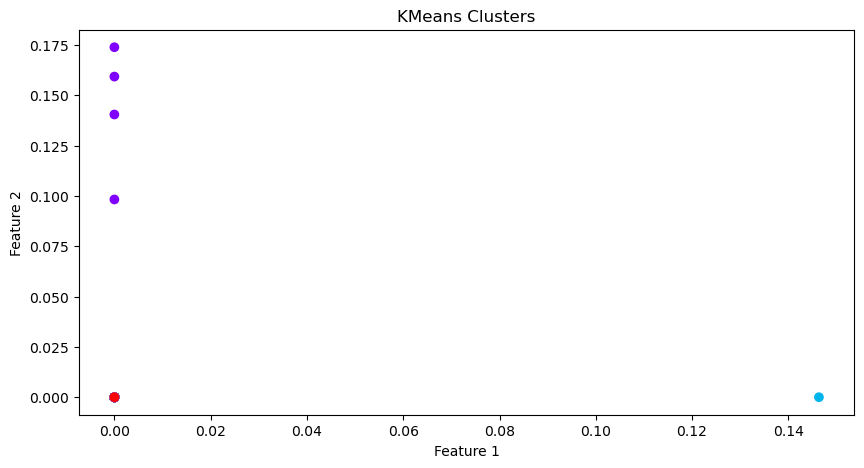

C:\Users\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[0.00180489 0.00110663 0.00110663 ... 0.00166636 0.00251688 0.01618042]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.06858009]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.09349699]]


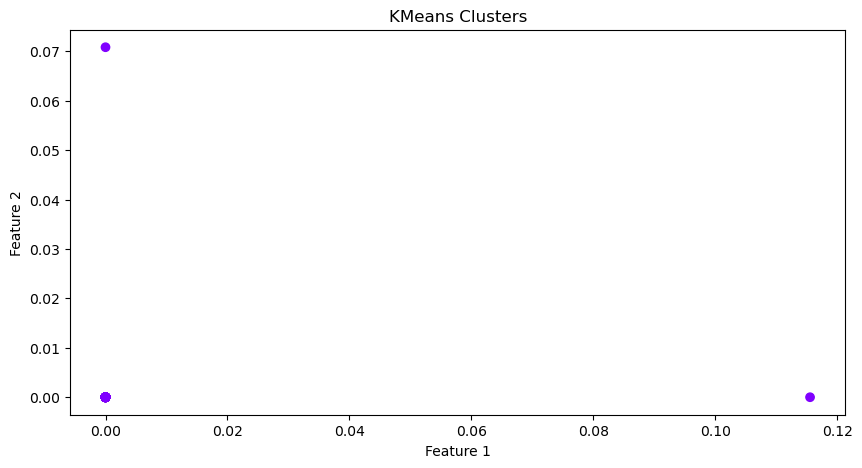

C:\Users\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[0.         0.00572727 0.00813334 ... 0.         0.         0.        ]
 [0.01257433 0.         0.         ... 0.         0.         0.        ]
 [0.0031435  0.         0.         ... 0.         0.00746434 0.        ]
 [0.00927452 0.         0.         ... 0.         0.         0.02068697]
 [0.01041683 0.         0.01221396 ... 0.01825009 0.         0.        ]]


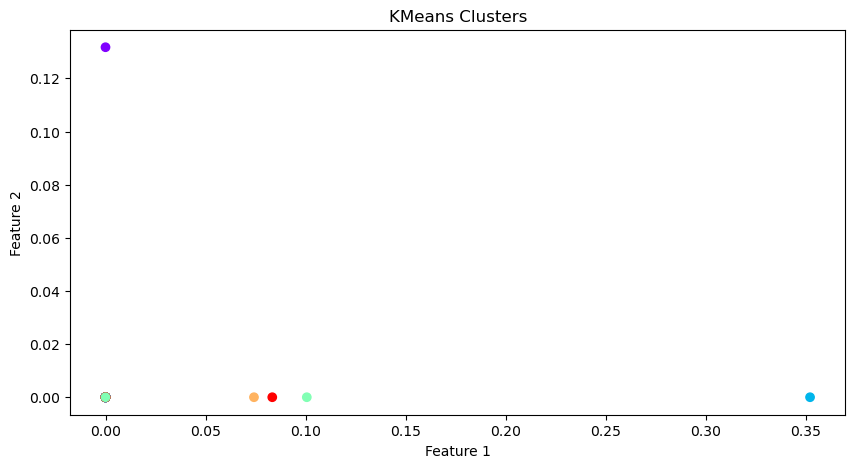

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, sentiment_columns, num_clusters=5):
    # Combine all review texts into a single list
    all_reviews = data[sentiment_columns].apply(lambda x: ' '.join(x), axis=1)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(all_reviews)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)

    # Add cluster labels to the dataframe
    data['cluster'] = kmeans.labels_

    # Display cluster centers
    print("Cluster Centers:")
    print(kmeans.cluster_centers_)

    # Plot clusters
    plt.figure(figsize=(10, 5))
    plt.scatter(X.toarray()[:, 0], X.toarray()[:, 1], c=kmeans.labels_, cmap='rainbow')
    plt.title('KMeans Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Perform KMeans clustering for Alliance University
perform_kmeans_clustering(data_alliance_univ, sentiment_columns)

# Perform KMeans clustering for Christ University
perform_kmeans_clustering(data_christ_univ, sentiment_columns)

# Perform KMeans clustering for IIM Bangalore
perform_kmeans_clustering(data_iimb, sentiment_columns)

# Perform KMeans clustering for Jain University
perform_kmeans_clustering(data_jain_univ, sentiment_columns)
